In [ ]:
#RESEARCH QUESTION: IS THERE CORRELATION BETWEEN TIME FROM DIAGNOSIS TO TREATMENT AND ETHNICITY

In [2]:
import os
print(os.listdir())

['.Rhistory', 'sim_rtds_exposure.csv', 'sim_rtds_prescription.csv', '.config', 'Music', '.condarc', '.docker', '.DS_Store', '.CFUserTextEncoding', 'sim_av_patient.csv', '.xonshrc', 'Untitled.ipynb', '.zshrc', 'sim_sact_outcome.csv', 'sim_sact_drug_detail.csv', '.local', 'Pictures', 'sim_av_tumour.csv', '.zsh_history', '.ipython', 'Desktop', 'Library', '.matplotlib', 'BIPTechChallenge_MiniGroup.ipynb', 'Public', 'challenge.ipynb', '.tcshrc', '.RData', '.virtual_documents', '.anaconda', 'Movies', 'Applications', '.Rapp.history', '.Trash', 'sim_av_gene.csv', '.ipynb_checkpoints', '.jupyter', 'Documents', '.azuredatastudio', 'sim_rtds_episode.csv', '.RDataTmp', '.vscode', '.bash_profile', 'BIPtechnical challenge.ipynb', 'Downloads', '.continuum', '.zsh_sessions', 'tech_chal 1.ipynb', '.conda', 'sim_sact_cycle.csv', 'CNTW CONSULTATION', 'sim_sact_regimen.csv', 'sim_rtds_combined.csv']


In [3]:
import pandas as pd 

In [4]:
exposure = pd.read_csv('sim_rtds_exposure.csv')
print(exposure.head())

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/3470538671.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  exposure = pd.read_csv('sim_rtds_exposure.csv')


   PRESCRIPTIONID RADIOISOTOPE RADIOTHERAPYBEAMTYPE  RADIOTHERAPYBEAMENERGY  \
0        10000001          NaN                   T1                    6.00   
1        10000001          NaN                   T1                    6.00   
2        10000002          NaN                   T1                   10.00   
3        10000002          NaN                   T1                    6.00   
4        10000003          NaN                   T7                    0.08   

  TIMEOFEXPOSURE    APPTDATE           ATTENDID  PATIENTID  \
0          10:09  2018-08-11  10000001.20180811   10000008   
1          10:10  2018-08-11  10000001.20180811   10000008   
2          11:13  2015-05-18  10000002.20150518   10000011   
3          11:14  2015-05-18  10000002.20150518   10000011   
4          11:57  2018-12-09  10000003.20181209   10000013   

   RADIOTHERAPYEPISODEID LINKCODE  
0                1181234      LKY  
1                1181234      LKY  
2                1911727      LFW  
3       

In [5]:
#episode dataset
episode = pd.read_csv('sim_rtds_episode.csv')
print(episode.head())

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/401958590.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  episode = pd.read_csv('sim_rtds_episode.csv')


   PATIENTID  RADIOTHERAPYEPISODEID           ATTENDID    APPTDATE LINKCODE  \
0   10000008                1181234  10000001.20180811  2018-08-11      LKY   
1   10000008                1181234  10000001.20180812  2018-08-12      LKY   
2   10000008                1181234  10000001.20180813  2018-08-13      LKY   
3   10000008                1181234  10000001.20180817  2018-08-17      LKY   
4   10000008                1181234  10000001.20180818  2018-08-18      LKY   

  DECISIONTOTREATDATE EARLIESTCLINAPPROPDATE RADIOTHERAPYPRIORITY  \
0          2018-07-28             2018-07-28                    R   
1          2018-07-28             2018-07-28                    R   
2          2018-07-28             2018-07-28                    R   
3          2018-07-28             2018-07-28                    R   
4          2018-07-28             2018-07-28                    R   

   RADIOTHERAPYINTENT  
0                 2.0  
1                 2.0  
2                 2.0  
3             

In [6]:
#prescription dataset
prescription = pd.read_csv('sim_rtds_prescription.csv')
print(prescription.head())

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/4098855547.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription = pd.read_csv('sim_rtds_prescription.csv')


   PATIENTID  PRESCRIPTIONID  RTTREATMENTMODALITY  RTPRESCRIBEDDOSE  \
0   10000008        10000001                  5.0              35.0   
1   10000008        10000001                  5.0              35.0   
2   10000008        10000001                  5.0              35.0   
3   10000008        10000001                  5.0              35.0   
4   10000008        10000001                  5.0              35.0   

   RTPRESCRIBEDFRACTIONS  RTACTUALDOSE  RTACTUALFRACTIONS RTTREATMENTREGION  \
0                    5.0          35.0                5.0                 A   
1                    5.0          35.0                5.0                 A   
2                    5.0          35.0                5.0                 A   
3                    5.0          35.0                5.0                 A   
4                    5.0          35.0                5.0                 A   

  RTTREATMENTANATOMICALSITE  RADIOTHERAPYEPISODEID LINKCODE  \
0                      Z501        

In [7]:
#gene dataset
gene = pd.read_csv ('sim_av_gene.csv')
print(gene.head())

     GENEID  TUMOURID  PATIENTID      GENE_DESC  GENE  COUNT_TESTS  \
0  10030620  10090743   10403207  CD274 (PD-L1)  4842            1   
1  10030623  10754688   10403230           PMS2  3394            1   
2  10030624  11495342   10403261           PMS2  3394            1   
3  10030625  10390589   10403266           PMS2  3394            1   
4  10030629  11215449   10403316           PMS2  3394            1   

   COUNT_RESULTS  COUNT_DATE   ALL_TESTSTATUSES OVERALL_TS  ...  SEQ_VAR  \
0              2           1  b:normal,b:normal   b:normal  ...      NaN   
1              1           1           b:normal   b:normal  ...      NaN   
2              1           1           b:normal   b:normal  ...      NaN   
3              1           1           b:normal   b:normal  ...      NaN   
4              1           1           b:normal   b:normal  ...      NaN   

  DATE_OVERALL_TS BEST_DATE_SOURCE_OVERALL_TS    MIN_DATE    MAX_DATE  \
0      2018-03-14              3)receiveddate  20

In [8]:
#tumour dataset
tumour = pd.read_csv('sim_av_tumour.csv')
print(tumour.head())

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/795764328.py:2: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour = pd.read_csv('sim_av_tumour.csv')


   TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST SITE_ICD10_O2_3CHAR  \
0  10399610       1   10000001        2017-03-31                 C44   
1  10694862       1   10000002        2016-01-14                 C44   
2  11938715       2   10000003        2018-12-10                 C44   
3  11869010       1   10000004        2018-04-05                 C44   
4  11037077       1   10000005        2018-04-23                 C44   

  SITE_ICD10_O2 SITE_ICD10R4_O2_3CHAR_FROM2013 SITE_ICD10R4_O2_FROM2013  \
0          C444                            C44                     C444   
1          C449                            C44                     C449   
2          C442                            C44                     C442   
3          C449                            C44                     C449   
4          C446                            C44                     C446   

  SITE_ICDO3REV2011 SITE_ICDO3REV2011_3CHAR  ...       QUINTILE_2019  \
0              C444                     C44 

In [9]:
#patient dataset
patient = pd.read_csv('sim_av_patient.csv')
print(patient.head())

   PATIENTID  GENDER ETHNICITY DEATHCAUSECODE_1A DEATHCAUSECODE_1B  \
0   10000001       1         A               NaN               NaN   
1   10000002       1       NaN               NaN               NaN   
2   10000003       2         A               NaN               NaN   
3   10000004       1         A               NaN               NaN   
4   10000005       1         A               NaN               NaN   

  DEATHCAUSECODE_1C DEATHCAUSECODE_2 DEATHCAUSECODE_UNDERLYING  \
0               NaN              NaN                       NaN   
1               NaN              NaN                       NaN   
2               NaN              NaN                       NaN   
3               NaN              NaN                       NaN   
4               NaN              NaN                       NaN   

  DEATHLOCATIONCODE VITALSTATUS VITALSTATUSDATE  LINKNUMBER  
0               NaN           A      2022-07-05   101610884  
1               NaN           A      2022-07-05   10134378

In [10]:
#regimen dataset
regimen = pd.read_csv( 'sim_sact_regimen.csv')
print (regimen.head())

   ENCORE_PATIENT_ID  MERGED_REGIMEN_ID  HEIGHT_AT_START_OF_REGIMEN  \
0           10403208           10030621                         0.0   
1           10403217           10030622                         NaN   
2           10403309           10030627                         0.0   
3           10403312           10030628                         0.0   
4           10403374           10030632                         NaN   

   WEIGHT_AT_START_OF_REGIMEN INTENT_OF_TREATMENT DATE_DECISION_TO_TREAT  \
0                         NaN                   P             2020-04-28   
1                        60.5                   A             2022-02-04   
2                         0.0                  03             2021-12-29   
3                         NaN                  03                    NaN   
4                         NaN                   P             2017-03-31   

  START_DATE_OF_REGIMEN    MAPPED_REGIMEN CLINICAL_TRIAL CHEMO_RADIATION  \
0            2020-04-28  Hydroxycarbamid

In [11]:
#outcome dataset
outcome =pd.read_csv('sim_sact_outcome.csv')
print(outcome.head())

   MERGED_REGIMEN_ID DATE_OF_FINAL_TREATMENT REGIMEN_MOD_DOSE_REDUCTION  \
0           10030622                     NaN                          N   
1           10030627                     NaN                          N   
2           10030628              2019-03-12                          N   
3           10030632                     NaN                          N   
4           10030639                     NaN                          N   

  REGIMEN_MOD_TIME_DELAY REGIMEN_MOD_STOPPED_EARLY REGIMEN_OUTCOME_SUMMARY  
0                    NaN                       NaN                     NaN  
1                    NaN                       NaN                     NaN  
2                      N                         Y                     NaN  
3                      N                         N                     NaN  
4                    NaN                       NaN                     NaN  


In [12]:
#combined dataset
combined = pd.read_csv('sim_rtds_combined.csv')
print(combined.head())

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/2628781685.py:2: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  combined = pd.read_csv('sim_rtds_combined.csv')


   PATIENTID  PRESCRIPTIONID  RTTREATMENTMODALITY RADIOTHERAPYPRIORITY  \
0   10000008        10000001                  5.0                    R   
1   10000008        10000001                  5.0                    R   
2   10000008        10000001                  5.0                    R   
3   10000008        10000001                  5.0                    R   
4   10000008        10000001                  5.0                    R   

   RADIOTHERAPYINTENT  RTPRESCRIBEDDOSE  RTPRESCRIBEDFRACTIONS  RTACTUALDOSE  \
0                 2.0              35.0                    5.0          35.0   
1                 2.0              35.0                    5.0          35.0   
2                 2.0              35.0                    5.0          35.0   
3                 2.0              35.0                    5.0          35.0   
4                 2.0              35.0                    5.0          35.0   

   RTACTUALFRACTIONS RTTREATMENTREGION  ... DECISIONTOTREATDATE  \
0      

In [13]:
#cycle dataset
cycle = pd.read_csv ('sim_sact_cycle.csv')
print(cycle.head())

   MERGED_REGIMEN_ID  MERGED_CYCLE_ID  CYCLE_NUMBER START_DATE_OF_CYCLE  \
0           10030621         10000001             1          2020-04-28   
1           10030622         10000002             1          2022-03-27   
2           10030627         10000003             2          2022-01-26   
3           10030628         10000004             1          2019-04-11   
4           10030632         10000005             1          2017-03-31   

  OPCS_PROCUREMENT_CODE PERF_STATUS_START_OF_CYCLE  
0                  X713                        NaN  
1                   NaN                          0  
2                  X701                          1  
3                   NaN                        NaN  
4                   NaN                          0  


/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/651199230.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  cycle = pd.read_csv ('sim_sact_cycle.csv')


In [14]:

#drugdetail dataset
drug_detail = pd.read_csv ('sim_sact_drug_detail.csv')
print (drug_detail.head())

   MERGED_DRUG_DETAIL_ID  MERGED_CYCLE_ID  ACTUAL_DOSE_PER_ADMINISTRATION  \
0               10000001         10000001                           420.0   
1               10000002         10000002                           420.0   
2               10000003         10000003                           420.0   
3               10000004         10000004                             NaN   
4               10000005         10000005                           420.0   

  OPCS_DELIVERY_CODE  ADMINISTRATION_ROUTE ADMINISTRATION_DATE DRUG_GROUP  
0                NaN                   2.0          2020-04-28  IBRUTINIB  
1               X731                   2.0          2022-03-27  IBRUTINIB  
2                NaN                   2.0          2022-01-26  IBRUTINIB  
3                NaN                   2.0          2019-04-11  IBRUTINIB  
4                NaN                   2.0          2017-03-31  IBRUTINIB  


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [16]:
# --- Question 1: Time from diagnosis to treatment ---
# Step 1: Start from tumour + patient
df_q1 = tumour[['PATIENTID', 'DIAGNOSISDATEBEST']].drop_duplicates()
df_q1 = df_q1.merge(patient, on='PATIENTID', how='left')  # keep all patient info

# Step 2: Merge with regimen for treatment date
df_q1 = df_q1.merge(regimen[['ENCORE_PATIENT_ID', 'START_DATE_OF_REGIMEN']], 
                    left_on='PATIENTID', 
                    right_on='ENCORE_PATIENT_ID', 
                    how='inner')

# Step 3: Convert and compute time
df_q1['DIAGNOSISDATEBEST'] = pd.to_datetime(df_q1['DIAGNOSISDATEBEST'], errors='coerce')
df_q1['START_DATE_OF_REGIMEN'] = pd.to_datetime(df_q1['START_DATE_OF_REGIMEN'], errors='coerce')
df_q1['time_to_treatment'] = (df_q1['START_DATE_OF_REGIMEN'] - df_q1['DIAGNOSISDATEBEST']).dt.days

# Step 4: Clean
df_q1 = df_q1.dropna(subset=['time_to_treatment', 'ETHNICITY'])
df_q1 = df_q1[df_q1['time_to_treatment'] >= 0]


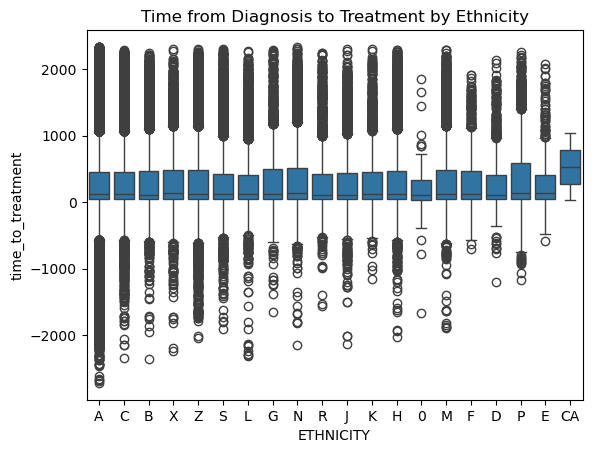

Kruskal-Wallis H-test p-value: 4.277895449468629e-12


In [17]:
#Question 1: Time from diagnosis to treatment
# Merge tumour with regimen (or episode) to get diagnosis and treatment start date
df_q1 = tumour[['PATIENTID', 'DIAGNOSISDATEBEST']].drop_duplicates()

# Assuming regimen.START_DATE_OF_REGIMEN as treatment start
df_q1 = df_q1.merge(regimen[['ENCORE_PATIENT_ID', 'START_DATE_OF_REGIMEN']], left_on='PATIENTID', right_on='ENCORE_PATIENT_ID')

# Convert dates to datetime
df_q1['DIAGNOSISDATEBEST'] = pd.to_datetime(df_q1['DIAGNOSISDATEBEST'])
df_q1['START_DATE_OF_REGIMEN'] = pd.to_datetime(df_q1['START_DATE_OF_REGIMEN'])

# Calculate time delta (in days)
df_q1['time_to_treatment'] = (df_q1['START_DATE_OF_REGIMEN'] - df_q1['DIAGNOSISDATEBEST']).dt.days

# Merge with patient ethnicity
df_q1 = df_q1.merge(patient[['PATIENTID', 'ETHNICITY']], left_on='PATIENTID', right_on='PATIENTID')

# Drop missing values
df_q1 = df_q1.dropna(subset=['time_to_treatment', 'ETHNICITY'])

# Visualize
sns.boxplot(data=df_q1, x='ETHNICITY', y='time_to_treatment')
plt.title('Time from Diagnosis to Treatment by Ethnicity')
plt.show()

# Statistical test example
groups = [group['time_to_treatment'].values for name, group in df_q1.groupby('ETHNICITY')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test p-value: {p}")

In [18]:
# Summary statistics by ethnicity
summary = df_q1.groupby('ETHNICITY')['time_to_treatment'].agg(
    Count='count',
    Median_Days='median',
    Mean_Days='mean',
    Std_Dev='std',
    Q1=lambda x: np.percentile(x, 25),
    Q3=lambda x: np.percentile(x, 75)
)

# Add % of patients per group
summary['% of Total'] = (summary['Count'] / summary['Count'].sum() * 100).round(2)

# Sort by median for clarity
summary = summary.sort_values(by='Median_Days', ascending=False)

print(summary)


            Count  Median_Days   Mean_Days     Std_Dev      Q1      Q3  \
ETHNICITY                                                                
CA              2        529.0  529.000000  712.763635  277.00  781.00   
P            3231        138.0  354.408542  473.930529   45.50  586.00   
X            5200        134.0  324.042308  465.550876   45.00  483.50   
N            6170        130.5  344.669044  492.403858   45.00  506.00   
E             526        130.0  312.264259  431.271507   46.25  411.25   
G            2070        127.0  325.085024  486.586406   43.25  492.75   
F             915        127.0  320.759563  438.983896   41.00  472.50   
Z           31948        124.0  327.101415  477.910831   44.00  482.25   
A          728371        119.0  314.725133  468.596545   42.00  453.00   
K            2019        119.0  323.030213  462.242953   43.50  452.50   
H           10667        118.0  327.020343  478.879466   41.00  462.00   
C           30757        118.0  316.97

In [19]:
# Step 1: Define threshold
threshold_days = 30

# Step 2: Calculate % of patients waiting more than 30 days, per ethnicity
delay_pct = df_q1.groupby('ETHNICITY').apply(
    lambda x: (x['time_to_treatment'] > threshold_days).mean() * 100
).round(2)

# Step 3: Rename the series to avoid conflict
delay_pct.name = 'Pct > 30 Days'

# Step 4: Ensure index consistency (optional but safer)
summary.index = summary.index.astype(str).str.strip()
delay_pct.index = delay_pct.index.astype(str).str.strip()

# Step 5: Join safely
summary = summary.drop(columns=['Pct > 30 Days'], errors='ignore')  # Drop existing if it exists
summary = summary.join(delay_pct)

# Step 6: View result
print(summary)


            Count  Median_Days   Mean_Days     Std_Dev      Q1      Q3  \
ETHNICITY                                                                
CA              2        529.0  529.000000  712.763635  277.00  781.00   
P            3231        138.0  354.408542  473.930529   45.50  586.00   
X            5200        134.0  324.042308  465.550876   45.00  483.50   
N            6170        130.5  344.669044  492.403858   45.00  506.00   
E             526        130.0  312.264259  431.271507   46.25  411.25   
G            2070        127.0  325.085024  486.586406   43.25  492.75   
F             915        127.0  320.759563  438.983896   41.00  472.50   
Z           31948        124.0  327.101415  477.910831   44.00  482.25   
A          728371        119.0  314.725133  468.596545   42.00  453.00   
K            2019        119.0  323.030213  462.242953   43.50  452.50   
H           10667        118.0  327.020343  478.879466   41.00  462.00   
C           30757        118.0  316.97

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/3739925089.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delay_pct = df_q1.groupby('ETHNICITY').apply(


In [20]:
summary = df_q1.groupby('ETHNICITY')['time_to_treatment'].agg([
    'count', 
    'median', 
    'mean', 
    'std', 
    lambda x: np.percentile(x, 25),  # Q1
    lambda x: np.percentile(x, 75)   # Q3
])
summary.columns = ['Count', 'Median_Days', 'Mean_Days', 'Std_Dev', 'Q1', 'Q3']
summary['% of Total'] = (summary['Count'] / summary['Count'].sum() * 100).round(2)


In [21]:
# Step 1: Calculate the percentage of delays > 30 days
threshold_days = 30
delay_pct = df_q1.groupby('ETHNICITY').apply(
    lambda x: (x['time_to_treatment'] > threshold_days).mean() * 100
).round(2).rename('Pct > 30 Days')

# Step 2: Ensure both indices are of the same type and sorted the same way
summary.index = summary.index.astype(str).str.strip()
delay_pct.index = delay_pct.index.astype(str).str.strip()

# Optional: Sort both (not required but helps with debugging)
summary = summary.sort_index()
delay_pct = delay_pct.sort_index()

# Step 3: Join safely
summary = summary.join(delay_pct, how='left')
print(summary)



            Count  Median_Days   Mean_Days     Std_Dev      Q1      Q3  \
ETHNICITY                                                                
0             106        104.0  211.867925  412.521008   35.25  338.50   
A          728371        119.0  314.725133  468.596545   42.00  453.00   
B            7452        112.0  317.254965  477.661073   41.00  462.25   
C           30757        118.0  316.973177  473.732288   43.00  451.00   
CA              2        529.0  529.000000  712.763635  277.00  781.00   
D             972        103.5  296.247942  445.323730   39.00  409.75   
E             526        130.0  312.264259  431.271507   46.25  411.25   
F             915        127.0  320.759563  438.983896   41.00  472.50   
G            2070        127.0  325.085024  486.586406   43.25  492.75   
H           10667        118.0  327.020343  478.879466   41.00  462.00   
J            6504        110.5  297.208180  440.635417   40.00  434.00   
K            2019        119.0  323.03

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/3229083514.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delay_pct = df_q1.groupby('ETHNICITY').apply(


In [22]:
print("Summary index:", summary.index.tolist())
print("Delay index:", delay_pct.index.tolist())


Summary index: ['0', 'A', 'B', 'C', 'CA', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z']
Delay index: ['0', 'A', 'B', 'C', 'CA', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z']


In [23]:
summary['Pct > 30 Days'] = delay_pct
print (summary)

            Count  Median_Days   Mean_Days     Std_Dev      Q1      Q3  \
ETHNICITY                                                                
0             106        104.0  211.867925  412.521008   35.25  338.50   
A          728371        119.0  314.725133  468.596545   42.00  453.00   
B            7452        112.0  317.254965  477.661073   41.00  462.25   
C           30757        118.0  316.973177  473.732288   43.00  451.00   
CA              2        529.0  529.000000  712.763635  277.00  781.00   
D             972        103.5  296.247942  445.323730   39.00  409.75   
E             526        130.0  312.264259  431.271507   46.25  411.25   
F             915        127.0  320.759563  438.983896   41.00  472.50   
G            2070        127.0  325.085024  486.586406   43.25  492.75   
H           10667        118.0  327.020343  478.879466   41.00  462.00   
J            6504        110.5  297.208180  440.635417   40.00  434.00   
K            2019        119.0  323.03

In [24]:
# Create a mapping dictionary from code to description
ethnicity_map = {
    '0': 'White',
    '8': 'Other',
    'A': 'White British',
    'B': 'White Irish',
    'C': 'Any other White background',
    'CA': 'English',
    'CH': 'Turkish',
    'CP': 'Polish',
    'D': 'White and Black Caribbean',
    'E': 'White and Black African',
    'F': 'White and Asian',
    'G': 'Any other mixed background',
    'H': 'Asian Indian',
    'J': 'Asian Pakistani',
    'K': 'Asian Bangladeshi',
    'L': 'Any other Asian background',
    'M': 'Black Caribbean',
    'N': 'Black African',
    'P': 'Any other Black background',
    'R': 'Chinese',
    'S': 'Any other ethnic group',
    'X': 'Not known',
    'Z': 'Not stated'
}

# Replace codes with descriptions in df_q1
df_q1['ETHNICITY'] = df_q1['ETHNICITY'].map(ethnicity_map)

# If you want to replace codes in the summary DataFrame index
summary.index = summary.index.map(ethnicity_map)

# If you want to do it for the summary_sorted or any other summary dataframe, do the same:
# summary_sorted.index = summary_sorted.index.map(ethnicity_map)


/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/1615347186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


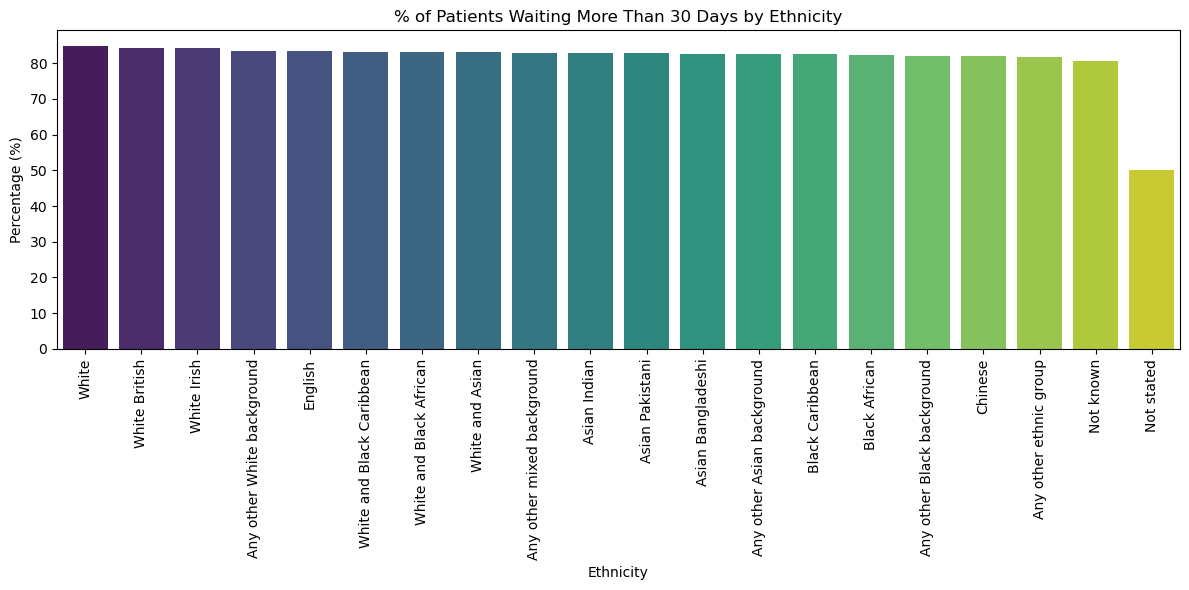

In [25]:
#Bar chart: % of patients waiting >30 days by ethnicity
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=summary.sort_values('Pct > 30 Days', ascending=False), 
    x=summary.index, 
    y='Pct > 30 Days', 
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title('% of Patients Waiting More Than 30 Days by Ethnicity')
plt.ylabel('Percentage (%)')
plt.xlabel('Ethnicity')
plt.tight_layout()
plt.show()


/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_10010/2853219837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_q1, x='ETHNICITY', y='time_to_treatment', palette='Set3')


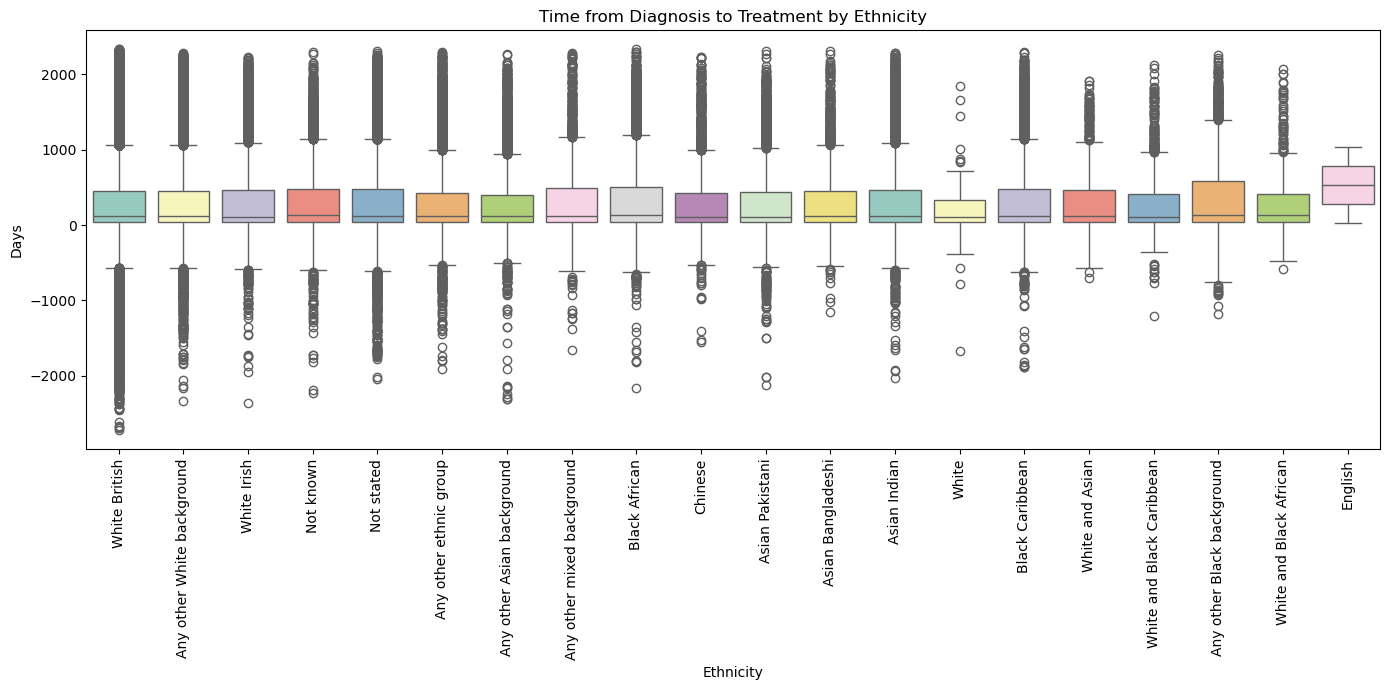

In [26]:
# Boxplot: Distribution of time to treatment by ethnicity
plt.figure(figsize=(14,7))
sns.boxplot(data=df_q1, x='ETHNICITY', y='time_to_treatment', palette='Set3')
plt.xticks(rotation=90)
plt.title('Time from Diagnosis to Treatment by Ethnicity')
plt.ylabel('Days')
plt.xlabel('Ethnicity')
plt.tight_layout()
plt.show()


In [27]:
#Kruskal-Wallis test (non-parametric test for differences across groups)
from scipy.stats import kruskal

groups = [group['time_to_treatment'].values for name, group in df_q1.groupby('ETHNICITY')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test statistic: {stat:.3f}, p-value: {p:.5f}")


Kruskal-Wallis H-test statistic: 94.991, p-value: 0.00000


In [28]:
# Pairwise post hoc test (Dunn's test) to find which groups differ
!pip install scikit-posthocs


In [29]:
import scikit_posthocs as sp

In [30]:
# Dunn's test for pairwise comparisons
posthoc = sp.posthoc_dunn(
    df_q1, 
    val_col='time_to_treatment', 
    group_col='ETHNICITY', 
    p_adjust='bonferroni'
)

print(posthoc)

                            Any other Asian background  \
Any other Asian background                    1.000000   
Any other Black background                    0.000057   
Any other White background                    1.000000   
Any other ethnic group                        1.000000   
Any other mixed background                    1.000000   
Asian Bangladeshi                             1.000000   
Asian Indian                                  1.000000   
Asian Pakistani                               1.000000   
Black African                                 0.000617   
Black Caribbean                               1.000000   
Chinese                                       1.000000   
English                                       1.000000   
Not known                                     0.001468   
Not stated                                    0.009083   
White                                         1.000000   
White British                                 1.000000   
White Irish   

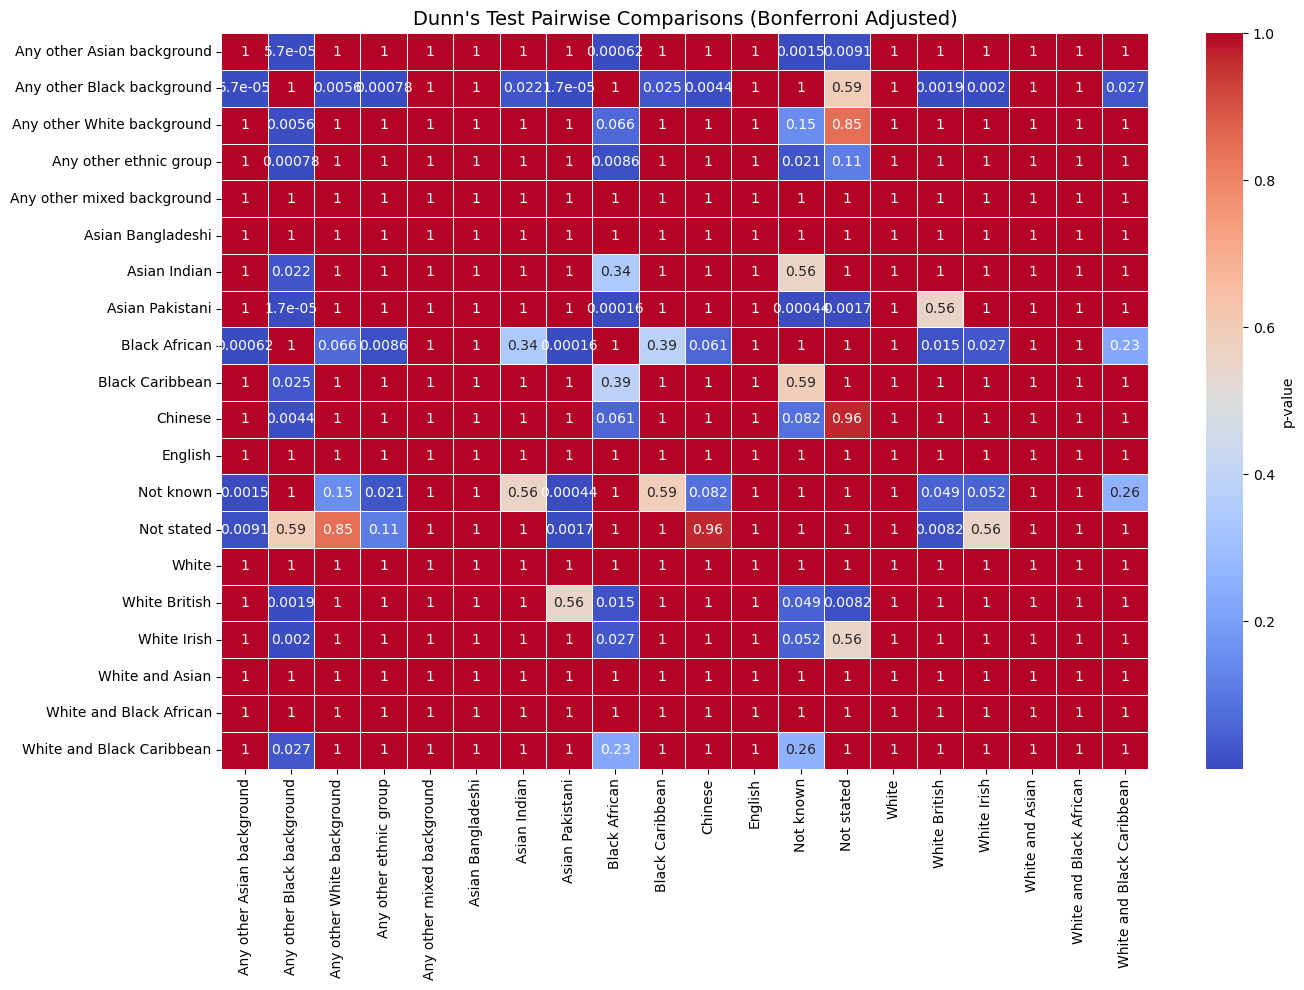

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the Dunn’s test p-values
plt.figure(figsize=(14, 10))
sns.heatmap(posthoc, 
            annot=True,         # show p-values in the heatmap
            cmap='coolwarm',    # color scheme
            fmt=".2g",          # format numbers nicely
            linewidths=0.5, 
            cbar_kws={'label': 'p-value'})

plt.title("Dunn's Test Pairwise Comparisons (Bonferroni Adjusted)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [32]:
import scikit_posthocs as sp

posthoc = sp.posthoc_dunn(
    df_q1, 
    val_col='time_to_treatment', 
    group_col='ETHNICITY', 
    p_adjust='bonferroni'
)


In [33]:
# Your existing ethnicity_map dictionary (codes -> full names)
ethnicity_map = {
    '0': 'White',
    '8': 'Other',
    'A': 'White British',
    'B': 'White Irish',
    'C': 'Any other White background',
    'CA': 'English',
    'CH': 'Turkish',
    'CP': 'Polish',
    'D': 'White and Black Caribbean',
    'E': 'White and Black African',
    'F': 'White and Asian',
    'G': 'Any other mixed background',
    'H': 'Asian Indian',
    'J': 'Asian Pakistani',
    'K': 'Asian Bangladeshi',
    'L': 'Any other Asian background',
    'M': 'Black Caribbean',
    'N': 'Black African',
    'P': 'Any other Black background',
    'R': 'Chinese',
    'S': 'Any other ethnic group',
    'X': 'Not known',
    'Z': 'Not stated'
}

# Rename index and columns of posthoc
posthoc.index = posthoc.index.map(ethnicity_map)
posthoc.columns = posthoc.columns.map(ethnicity_map)


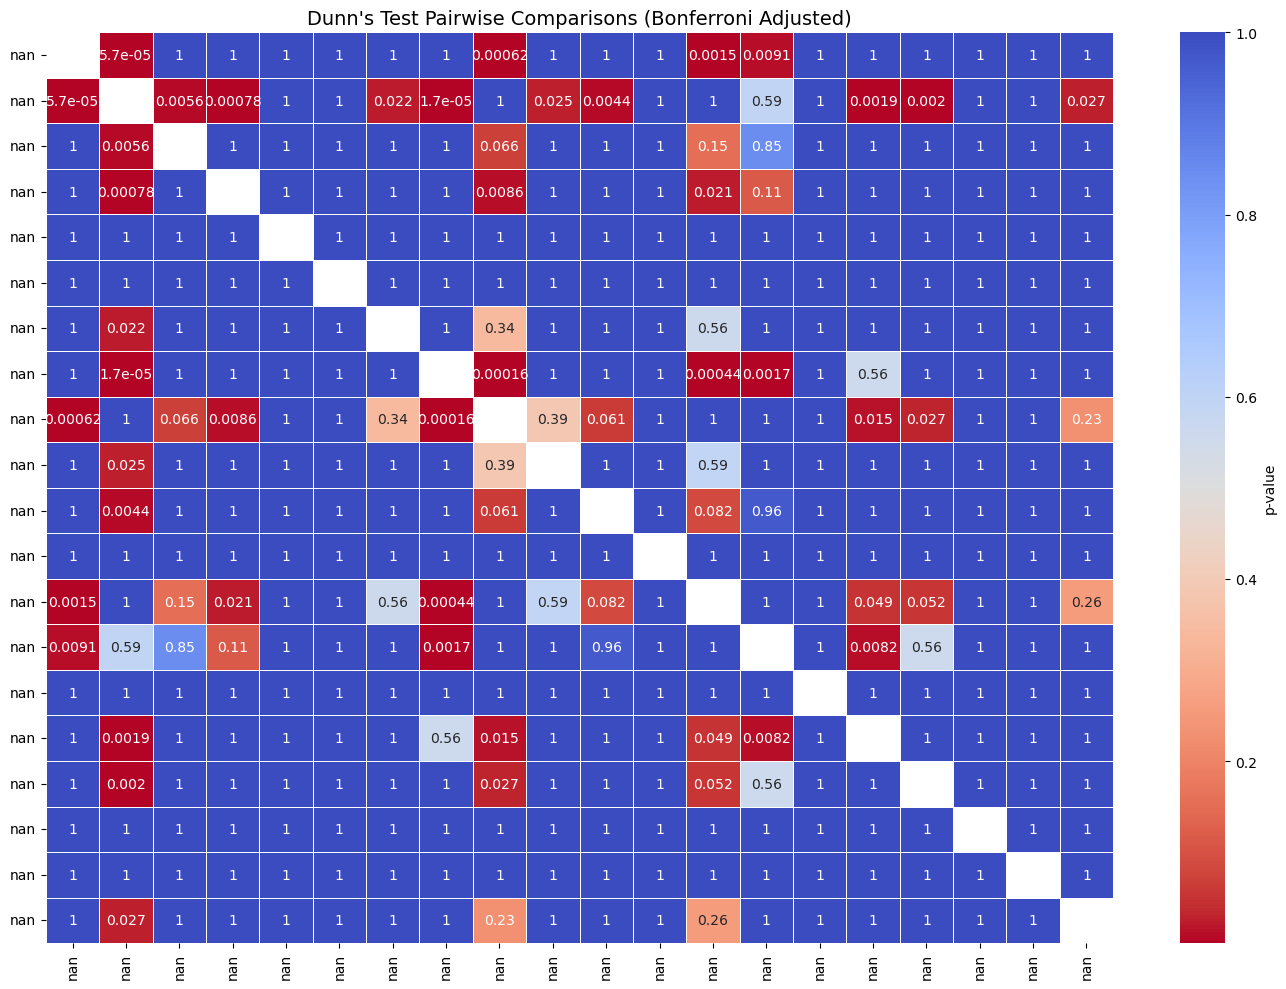

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.eye(posthoc.shape[0], dtype=bool)  # True on diagonal

plt.figure(figsize=(14, 10))
sns.heatmap(posthoc,
            annot=True,
            cmap='coolwarm_r',  # reversed for emphasis on low p-values
            fmt=".2g",
            linewidths=0.5,
            cbar_kws={'label': 'p-value'},
            mask=mask)  # hide diagonal

plt.title("Dunn's Test Pairwise Comparisons (Bonferroni Adjusted)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. Median and mean time_to_treatment by ethnicity
summary_stats = df_q1.groupby('ETHNICITY')['time_to_treatment'].agg(['median', 'mean', 'count']).reset_index()
print("Median and Mean time_to_treatment by ETHNICITY:")
print(summary_stats)

# 2. Extract significant pairwise differences from Dunn's posthoc test (p < 0.05)
signif_pairs = []
for i in posthoc.index:
    for j in posthoc.columns:
        if i != j:
            p_val = posthoc.loc[i, j]
            if p_val < 0.05:
                # Calculate median difference between groups i and j
                median_i = summary_stats.loc[summary_stats['ETHNICITY'] == i, 'median'].values[0]
                median_j = summary_stats.loc[summary_stats['ETHNICITY'] == j, 'median'].values[0]
                median_diff = median_i - median_j
                signif_pairs.append({
                    'Group 1': i,
                    'Group 2': j,
                    'p-value': p_val,
                    'Median Difference (G1 - G2)': median_diff
                })

signif_df = pd.DataFrame(signif_pairs).drop_duplicates()
print("\nSignificant Dunn's Test Pairwise Differences:")
print(signif_df.sort_values('p-value'))

# 3. Explore potential confounders with a simple linear regression example:
# You can replace or add variables (e.g., deprivation, age, gender)
# Assuming 'deprivation', 'age', 'gender' columns exist in df_q1

# Drop missing values in relevant columns
model_data = df_q1.dropna(subset=['time_to_treatment', 'ETHNICITY', 'deprivation', 'age', 'gender'])

# Fit a linear regression model (time_to_treatment ~ ethnicity + confounders)
model = smf.ols('time_to_treatment ~ C(ETHNICITY) + deprivation + age + C(gender)', data=model_data).fit()

print("\nRegression Model Summary Adjusting for Confounders:")
print(model.summary())

# 4. (Optional) Prepare the data for qualitative or health system factor exploration as next steps
# This is more domain-specific and would require additional data or qualitative methods


Median and Mean time_to_treatment by ETHNICITY:
                     ETHNICITY  median        mean   count
0   Any other Asian background   115.0  293.812996    5925
1   Any other Black background   138.0  354.408542    3231
2   Any other White background   118.0  316.973177   30757
3       Any other ethnic group   116.0  305.591413   11995
4   Any other mixed background   127.0  325.085024    2070
5            Asian Bangladeshi   119.0  323.030213    2019
6                 Asian Indian   118.0  327.020343   10667
7              Asian Pakistani   110.5  297.208180    6504
8                Black African   130.5  344.669044    6170
9              Black Caribbean   117.0  323.008980    7572
10                     Chinese   113.0  306.915892    2473
11                     English   529.0  529.000000       2
12                   Not known   134.0  324.042308    5200
13                  Not stated   124.0  327.101415   31948
14                       White   104.0  211.867925     106
15      

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [77]:
signif_pairs = []

for i in posthoc.index:
    for j in posthoc.columns:
        if i != j:
            # Make sure this is a single value (float) and not missing
            p_val = posthoc.loc[i, j]
            if pd.notnull(p_val) and np.isscalar(p_val) and p_val < 0.05:
                # Check if i and j exist in your summary_stats ethnicity list
                if i in summary_stats['ETHNICITY'].values and j in summary_stats['ETHNICITY'].values:
                    median_i = summary_stats.loc[summary_stats['ETHNICITY'] == i, 'median'].values[0]
                    median_j = summary_stats.loc[summary_stats['ETHNICITY'] == j, 'median'].values[0]
                    median_diff = median_i - median_j
                    signif_pairs.append({
                        'Group 1': i,
                        'Group 2': j,
                        'p-value': p_val,
                        'Median Difference (G1 - G2)': median_diff
                    })

signif_df = pd.DataFrame(signif_pairs).drop_duplicates()
print("\nSignificant Dunn's Test Pairwise Differences:")
print(signif_df.sort_values('p-value'))


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [79]:
print(set(posthoc.index) - set(summary_stats['ETHNICITY']))
print(set(summary_stats['ETHNICITY']) - set(posthoc.index))


{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}
{'Any other ethnic group', 'White and Asian', 'Any other Asian background', 'White and Black African', 'Any other Black background', 'White British', 'Asian Bangladeshi', 'Not stated', 'Asian Indian', 'Any other White background', 'White', 'White Irish', 'Black African', 'Asian Pakistani', 'Any other mixed background', 'Chinese', 'White and Black Caribbean', 'English', 'Not known', 'Black Caribbean'}


In [81]:
import pandas as pd
import scikit_posthocs as sp
import numpy as np

# --- Step 1: Clean data ---
df_q1_clean = df_q1.dropna(subset=['ETHNICITY', 'time_to_treatment'])

# --- Step 2: Summary stats by ethnicity ---
summary_stats = df_q1_clean.groupby('ETHNICITY')['time_to_treatment'].agg(
    median='median',
    mean='mean',
    count='count'
).reset_index()

print("Median and Mean time_to_treatment by ETHNICITY:")
print(summary_stats)

# --- Step 3: Run Dunn's post-hoc test ---
posthoc = sp.posthoc_dunn(
    df_q1_clean,
    val_col='time_to_treatment',
    group_col='ETHNICITY',
    p_adjust='bonferroni'
)

# Make sure posthoc has correct labels:
posthoc.index = posthoc.columns = summary_stats['ETHNICITY'].values

# --- Step 4: Extract significant pairwise differences ---
print("\nSignificant pairwise differences (p < 0.05):")

for i in posthoc.index:
    for j in posthoc.columns:
        if i != j:
            p_val = posthoc.loc[i, j]
            if p_val < 0.05:
                median_i = summary_stats.loc[summary_stats['ETHNICITY'] == i, 'median'].values[0]
                median_j = summary_stats.loc[summary_stats['ETHNICITY'] == j, 'median'].values[0]
                diff = median_i - median_j
                print(f"{i} vs {j}: p = {p_val:.4f}, median difference = {diff}")



Median and Mean time_to_treatment by ETHNICITY:
                     ETHNICITY  median        mean   count
0   Any other Asian background   115.0  293.812996    5925
1   Any other Black background   138.0  354.408542    3231
2   Any other White background   118.0  316.973177   30757
3       Any other ethnic group   116.0  305.591413   11995
4   Any other mixed background   127.0  325.085024    2070
5            Asian Bangladeshi   119.0  323.030213    2019
6                 Asian Indian   118.0  327.020343   10667
7              Asian Pakistani   110.5  297.208180    6504
8                Black African   130.5  344.669044    6170
9              Black Caribbean   117.0  323.008980    7572
10                     Chinese   113.0  306.915892    2473
11                     English   529.0  529.000000       2
12                   Not known   134.0  324.042308    5200
13                  Not stated   124.0  327.101415   31948
14                       White   104.0  211.867925     106
15      